# 0.005 GeV


## Raw data sample

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Completed!

Splitting Dataset:
Completed!



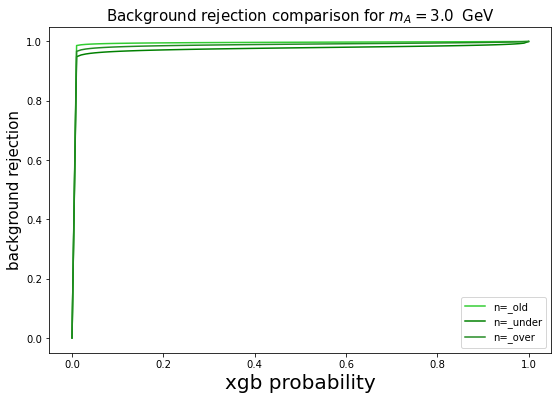

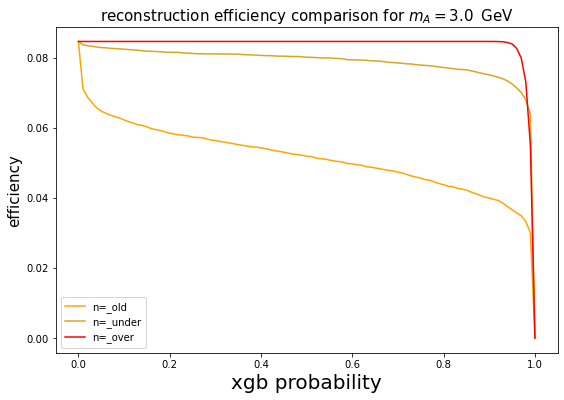

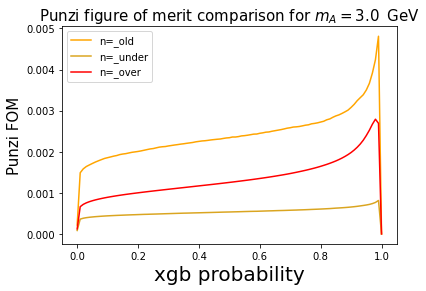

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



binning = np.linspace(0,1,21)


df = pq.read_table(f"/ceph/aavocone/Datasets/0_large.parquet")
df = df.to_pandas()

print("Completed!\n")
print("Splitting Dataset:")
X = df[df.columns[:-1]]    #exclude "signal" "classification"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
print("Completed!\n")



model_old = xgb.XGBClassifier()
model_old.load_model("/ceph/aavocone/models/new_0_0_model500.txt")
y_old = model_old.predict_proba(xtest)[:,1]

model_under = xgb.XGBClassifier()
model_under.load_model("/ceph/aavocone/models/under0_500.txt")
y_under = model_under.predict_proba(xtest)[:,1]

model_over = xgb.XGBClassifier()
model_over.load_model("/ceph/aavocone/models/over0_500.txt")
y_over = model_over.predict_proba(xtest)[:,1]


sh_old,bh_old,s_old,b_old,bin_edges = fc.efficiency(y_old,ytest, eff_type = 1)
sh_under,bh_under,s_under,b_under,bin_edges = fc.efficiency(y_under,ytest, eff_type = 1)
sh_over,bh_over,s_over,b_over,bin_edges = fc.efficiency(y_over,ytest, eff_type = 1)



plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b_old, label = "n=_old", color ="limegreen")
plt.plot(bin_edges, 1-b_under, label = "n=_under", color ="green")
plt.plot(bin_edges, 1-b_over, label = "n=_over", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s_old, label = "n=_old", color ="orange")
plt.plot(bin_edges, s_under, label = "n=_under", color ="goldenrod")
plt.plot(bin_edges, s_over, label = "n=_over", color ="red")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("efficiency",fontsize=15)
plt.title(f"reconstruction efficiency comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


#ponzi
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.plot(bin_edges, PFOM(s_old,b_old,bh_old,5), label = "n=_old", color ="orange")
plt.plot(bin_edges, PFOM(s_under,b_under,bh_under,5), label = "n=_under", color ="goldenrod")
plt.plot(bin_edges, PFOM(s_over,b_over,bh_over,5), label = "n=_over", color ="red")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_PFOM3.pdf", format="pdf",bbox_inches="tight")
plt.show()



## Overfitted data sample

# 3.0 GeV

## Raw data sample

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



binning = np.linspace(0,1,21)


df = pq.read_table(f"/ceph/aavocone/Datasets/3_large.parquet")
df = df.to_pandas()

print("Completed!\n")
print("Splitting Dataset:")
X = df[df.columns[:-1]]    #exclude "signal" "classification"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
print("Completed!\n")



model_old = xgb.XGBClassifier()
model_old.load_model("/ceph/aavocone/models/3_0_500.txt")
y_old = model_old.predict_proba(xtest)[:,1]

model_under = xgb.XGBClassifier()
model_under.load_model("/ceph/aavocone/models/3_0_141.txt")
y_under = model_under.predict_proba(xtest)[:,1]



sh_old,bh_old,s_old,b_old,bin_edges = fc.efficiency(y_old,ytest, eff_type = 1)
sh_under,bh_under,s_under,b_under,bin_edges = fc.efficiency(y_under,ytest, eff_type = 1)


plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b_old, label = "n= 500", color ="limegreen")
plt.plot(bin_edges, 1-b_under, label = "n=141", color ="green")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s_old, label = "n= 500", color ="orange")
plt.plot(bin_edges, s_under, label = "n=141", color ="goldenrod")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("efficiency",fontsize=15)
plt.title(f"reconstruction efficiency comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


#ponzi
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.figure(figsize=(9,6))
plt.plot(bin_edges, PFOM(s_old,b_old,bh_old,5), label = "n= 500", color ="orange")
plt.plot(bin_edges, PFOM(s_under,b_under,bh_under,5), label = "n= 141", color ="goldenrod")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_PFOM3.pdf", format="pdf",bbox_inches="tight")
plt.show()


Completed!

Splitting Dataset:
Completed!



XGBoostError: [11:39:32] ../dmlc-core/src/io/local_filesys.cc:209: Check failed: allow_null:  LocalFileSystem::Open "/ceph/aavocone/models/3_0_500.txt": No such file or directory
Stack trace:
  [bt] (0) /work/aavocone/anaconda3/envs/Bachelor/lib/libxgboost.so(+0xc5519) [0x7f8eba72f519]
  [bt] (1) /work/aavocone/anaconda3/envs/Bachelor/lib/libxgboost.so(dmlc::io::LocalFileSystem::Open(dmlc::io::URI const&, char const*, bool)+0x3e3) [0x7f8ebaa4ae23]
  [bt] (2) /work/aavocone/anaconda3/envs/Bachelor/lib/libxgboost.so(dmlc::Stream::Create(char const*, char const*, bool)+0x48) [0x7f8ebaa22468]
  [bt] (3) /work/aavocone/anaconda3/envs/Bachelor/lib/libxgboost.so(XGBoosterLoadModel+0x4fa) [0x7f8eba71e8ca]
  [bt] (4) /work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x7f8ef462d9dd]
  [bt] (5) /work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x7f8ef462d067]
  [bt] (6) /work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(_ctypes_callproc+0x319) [0x7f8ef46461e9]
  [bt] (7) /work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x13c95) [0x7f8ef4646c95]
  [bt] (8) /work/aavocone/anaconda3/envs/Bachelor/bin/python(_PyObject_MakeTpCall+0x3bf) [0x561451aec13f]



# 4.6 GeV

## Raw data sample

Completed!

Splitting Dataset:
Completed!



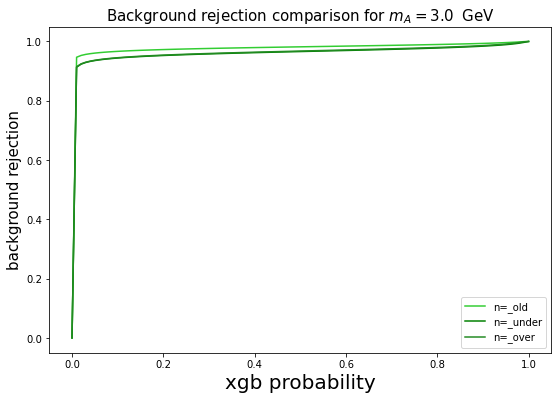

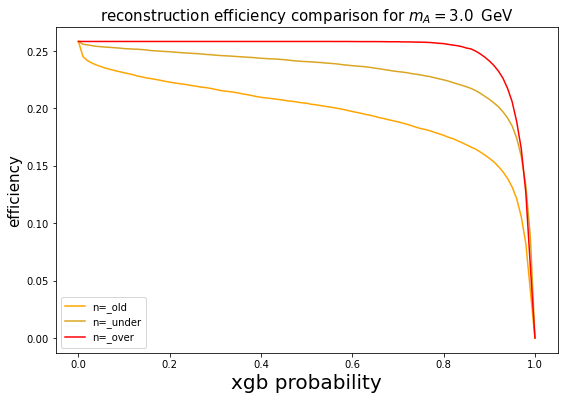

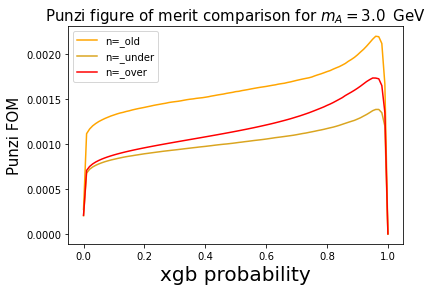

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



binning = np.linspace(0,1,21)


df = pq.read_table(f"/ceph/aavocone/Datasets/4_large.parquet")
df = df.to_pandas()

print("Completed!\n")
print("Splitting Dataset:")
X = df[df.columns[:-1]]    #exclude "signal" "classification"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
print("Completed!\n")



model_old = xgb.XGBClassifier()
model_old.load_model("/ceph/aavocone/models/new_4_6_model500.txt")
y_old = model_old.predict_proba(xtest)[:,1]

model_under = xgb.XGBClassifier()
model_under.load_model("/ceph/aavocone/models/under4_500.txt")
y_under = model_under.predict_proba(xtest)[:,1]

model_over = xgb.XGBClassifier()
model_over.load_model("/ceph/aavocone/models/over4_500.txt")
y_over = model_over.predict_proba(xtest)[:,1]


sh_old,bh_old,s_old,b_old,bin_edges = fc.efficiency(y_old,ytest, eff_type = 1)
sh_under,bh_under,s_under,b_under,bin_edges = fc.efficiency(y_under,ytest, eff_type = 1)
sh_over,bh_over,s_over,b_over,bin_edges = fc.efficiency(y_over,ytest, eff_type = 1)



plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b_old, label = "n=_old", color ="limegreen")
plt.plot(bin_edges, 1-b_under, label = "n=_under", color ="green")
plt.plot(bin_edges, 1-b_over, label = "n=_over", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s_old, label = "n=_old", color ="orange")
plt.plot(bin_edges, s_under, label = "n=_under", color ="goldenrod")
plt.plot(bin_edges, s_over, label = "n=_over", color ="red")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("efficiency",fontsize=15)
plt.title(f"reconstruction efficiency comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_all_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


#ponzi
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.plot(bin_edges, PFOM(s_old,b_old,bh_old,5), label = "n=_old", color ="orange")
plt.plot(bin_edges, PFOM(s_under,b_under,bh_under,5), label = "n=_under", color ="goldenrod")
plt.plot(bin_edges, PFOM(s_over,b_over,bh_over,5), label = "n=_over", color ="red")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/large_PFOM3.pdf", format="pdf",bbox_inches="tight")
plt.show()